## CUSTOMER SEGMENTATION

#### Market Research. This is Sprocket Central Pty Ltd. Dataset, they are a medium size Bikes and Accesories Business. They need help with their Customer and Transactions data.They have a large dataset of transactions, Customer Demography and New Cstomers.

##### This is an unstructured Machine Learning Project.

##### I intend to help Sprocket identity the characteristics of the different kinds of Customers thay have and how to market effectively to them.



In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
!pip install yellowbrick

In [3]:
transactions = pd.read_excel("Mentor'sKPMG_Sprocket Project Dataset.xlsx", sheet_name = "Transactions")

transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1.0,2.0,2950.0,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2.0,3.0,3120.0,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3.0,37.0,402.0,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4.0,88.0,3135.0,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5.0,78.0,787.0,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  float64       
 1   product_id               20000 non-null  float64       
 2   customer_id              20000 non-null  float64       
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [5]:
### Observations
##### There are blank cells in the following features online order, brand, product line, product class, product size, standard cost and product first sold.

In [6]:
transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [7]:
#Loading the datasets

demographic = pd.read_excel("Mentor'sKPMG_Sprocket Project Dataset.xlsx", sheet_name = "CustomerDemographic")

demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1.0,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2.0,Eli,Bockman,Male,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3.0,Arlin,Dearle,Male,61.0,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4.0,Talbot,NaN,Male,33.0,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5.0,Sheila-kathryn,Calton,Female,56.0,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [8]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   float64       
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   float64       
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [9]:
demographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [10]:
#drop insignificant variable

demographic.drop(['first_name', 'last_name', 'default', 'job_title'], axis=1, inplace=True)


In [11]:
demographic.drop('deceased_indicator', axis=1, inplace=True)

In [12]:
#Drop null

demographic = demographic.dropna(axis=1, how='all')
demographic = demographic.dropna()

In [13]:
#Some variables are encoded with 2 names for single category

demographic['gender'].replace(['F', 'Femal'], 'Female', inplace=True)
demographic['gender'].replace('M', 'Male', inplace=True)
demographic['gender'].replace('U', 'Unknown', inplace=True)

In [14]:
#creating age column

demographic['age'] = (dt.datetime.now() - demographic['DOB']) / np.timedelta64(1, 'Y')
demographic['age_class'] = ((round(demographic['age'] / 10)) * 10).astype(int)
demographic.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class
0,1.0,Female,93.0,1953-10-12,Health,Mass Customer,Yes,11.0,69.221445,70
1,2.0,Male,81.0,1980-12-16,Financial Services,Mass Customer,Yes,16.0,42.042243,40
2,3.0,Male,61.0,1954-01-20,Property,Mass Customer,Yes,15.0,68.947655,70
3,4.0,Male,33.0,1961-10-03,IT,Mass Customer,No,7.0,61.245922,60
5,6.0,Male,35.0,1966-09-16,Retail,High Net Worth,Yes,13.0,56.293049,60


In [15]:
#Loading the datasets

address = pd.read_excel("Mentor'sKPMG_Sprocket Project Dataset.xlsx", sheet_name = "CustomerAddress")

address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,4.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
3,5.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0
4,6.0,9 Oakridge Court,3216.0,VIC,Australia,9.0


In [16]:
address = address.dropna()

address['state'].replace('New South Wales', 'NSW', inplace=True)
address['state'].replace('Victoria', 'VIC', inplace=True)

In [17]:
demo_add = pd.merge(demographic, address, left_index=True, right_index=True)
demo_add= demo_add.dropna()
demo_add.head()

,customer_id_x,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class,customer_id_y,address,postcode,state,country,property_valuation
0,1.0,Female,93.0,1953-10-12,Health,Mass Customer,Yes,11.0,69.221445,70,1.0,060 Morning Avenue,2016.0,NSW,Australia,10.0
1,2.0,Male,81.0,1980-12-16,Financial Services,Mass Customer,Yes,16.0,42.042243,40,2.0,6 Meadow Vale Court,2153.0,NSW,Australia,10.0
2,3.0,Male,61.0,1954-01-20,Property,Mass Customer,Yes,15.0,68.947655,70,4.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
3,4.0,Male,33.0,1961-10-03,IT,Mass Customer,No,7.0,61.245922,60,5.0,17979 Del Mar Point,2448.0,NSW,Australia,4.0
5,6.0,Male,35.0,1966-09-16,Retail,High Net Worth,Yes,13.0,56.293049,60,7.0,4 Delaware Trail,2210.0,NSW,Australia,9.0


In [18]:
transactions = transactions.sort_values('customer_id')

In [19]:
transactions = transactions.dropna(axis=1, how='all')
transactions = transactions.dropna()

In [20]:
transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [21]:
transactions['columnsoduct_first_sold_date'] = pd.TimedeltaIndex(transactions['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,columnsoduct_first_sold_date
14485,14486.0,23.0,1.0,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0,1991-08-07
18969,18970.0,11.0,1.0,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0,1996-11-11
16422,16423.0,9.0,1.0,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0,2003-08-07
5156,5157.0,47.0,1.0,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,2003-07-23
13423,13424.0,2.0,1.0,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,2005-08-11


In [22]:
transactions['transaction_date'].describe(datetime_is_numeric=True)

count                            19445
mean     2017-07-01 16:21:18.189766144
min                2017-01-01 00:00:00
25%                2017-04-01 00:00:00
50%                2017-07-03 00:00:00
75%                2017-10-02 00:00:00
max                2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [23]:
most_recent_purchase = transactions['transaction_date'].max()
transactions['last_purchase_days_ago'] = most_recent_purchase - transactions['transaction_date']
transactions['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
transactions['profit'] = transactions['list_price'] - transactions['standard_cost']
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,columnsoduct_first_sold_date,last_purchase_days_ago,profit
14485,14486.0,23.0,1.0,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0,1991-08-07,278.0,75.75
18969,18970.0,11.0,1.0,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0,1996-11-11,276.0,509.97
16422,16423.0,9.0,1.0,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0,2003-08-07,21.0,75.14
5156,5157.0,47.0,1.0,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,2003-07-23,233.0,189.28
13423,13424.0,2.0,1.0,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,2005-08-11,312.0,17.87


In [24]:
customer_data = transactions.groupby('customer_id').agg({
    'customer_id' : lambda x:x,
    'last_purchase_days_ago': lambda x: x.min(),
    'customer_id': lambda x: len(x),
    'profit': lambda x: x.sum()
})

In [25]:
customer_data.rename(columns={
    'last_purchase_days_ago': 'recency', 
    'customer_id': 'frequency', 
    'profit': 'monetary_value'
    }, inplace=True)

customer_data.head()

,frequency,recency,monetary_value
customer_id,,,
1.0,11,7.0,3018.09
2.0,3,128.0,2226.26
3.0,7,102.0,3290.21
4.0,2,195.0,220.57
5.0,6,16.0,2394.94


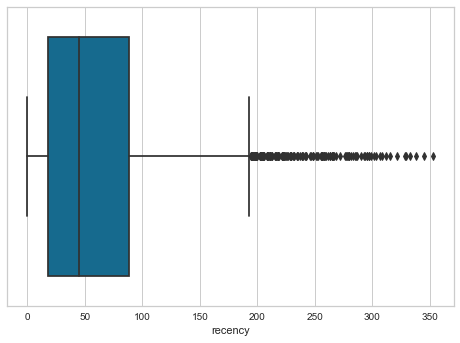

In [26]:
# outlier treatment for recency

sns.boxplot(customer_data['recency'])

q1 = customer_data.recency.quantile(0.25)
q3 = customer_data.recency.quantile(0.75)
iqr = q3 - q1
customer_data = customer_data[(customer_data.recency >= q1 - 1.5*iqr) & (customer_data.recency <= q3 + 1.5*iqr)]


,frequency,recency,monetary_value
customer_id,,,
1.0,11,7.0,3018.090000
2.0,3,128.0,2226.260000
3.0,7,102.0,3290.210000
5.0,6,16.0,2394.940000
6.0,5,64.0,3946.550000
...,...,...,...
3497.0,3,52.0,1648.320000
3498.0,6,127.0,3147.330000
3499.0,7,51.0,4955.250000


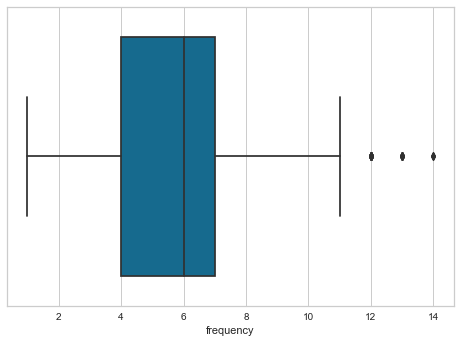

In [27]:
# outlier treatment for frequency

sns.boxplot(customer_data['frequency'])

q1 = customer_data.frequency.quantile(0.25)
q3 = customer_data.frequency.quantile(0.75)
iqr = q3 - q1
customer_data = customer_data[(customer_data.frequency >= q1 - 1.5*iqr) & (customer_data.frequency <= q3 + 1.5*iqr)]

customer_data

In [28]:
# outlier treatment for monetary
q1 = customer_data.monetary_value.quantile(0.25)
q3 = customer_data.monetary_value.quantile(0.75)
iqr = q3 - q1
customer_data = customer_data[(customer_data.monetary_value >= q1 - 1.5*iqr) & (customer_data.monetary_value <= q3 + 1.5*iqr)]

customer_data

,frequency,recency,monetary_value
customer_id,,,
1.0,11,7.0,3018.090000
2.0,3,128.0,2226.260000
3.0,7,102.0,3290.210000
5.0,6,16.0,2394.940000
6.0,5,64.0,3946.550000
...,...,...,...
3497.0,3,52.0,1648.320000
3498.0,6,127.0,3147.330000
3499.0,7,51.0,4955.250000


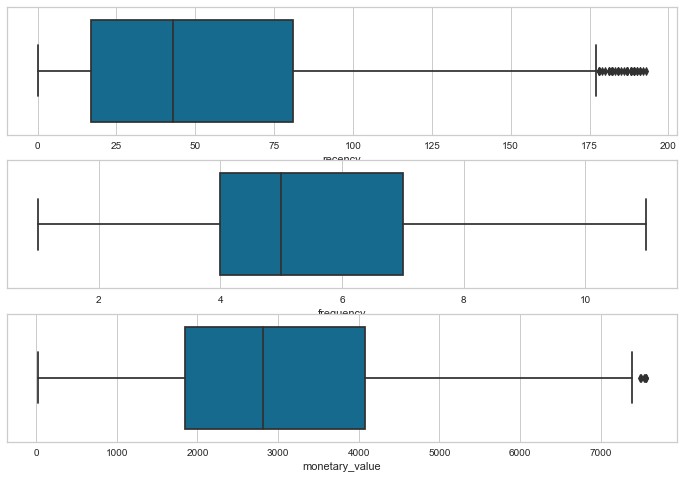

In [29]:
fig, ax = plt.subplots(3, 1, figsize=(12,8))

sns.boxplot(customer_data['recency'], ax= ax[0] )
sns.boxplot(customer_data['frequency'], ax=ax[1] )
sns.boxplot(customer_data['monetary_value'], ax=ax[2])
plt.show()


In [30]:
ss = StandardScaler()

customer_data['recency'] = ss.fit_transform(customer_data[['recency']] )

customer_data['frequency'] = ss.fit_transform(customer_data[['frequency']] )

customer_data['monetary_value'] = ss.fit_transform(customer_data[['monetary_value']] )

In [31]:
RFM = customer_data.copy()
RFM

,frequency,recency,monetary_value
customer_id,,,
1.0,2.567054,-1.043368,-0.004556
2.0,-1.214537,1.586116,-0.506816
3.0,0.676258,1.021103,0.168050
5.0,0.203559,-0.847786,-0.399822
6.0,-0.269139,0.195315,0.584368
...,...,...,...
3497.0,-1.214537,-0.065461,-0.873404
3498.0,0.203559,1.564384,0.077421
3499.0,0.676258,-0.087192,1.224189


In [32]:
# create elbow curve and find optimal number of clusters
cluster_error = []

for num_clusters in range(1,15):
    clusters = KMeans(n_clusters=num_clusters, n_init=10)
    clusters.fit(RFM)
    cluster_error.append(clusters.inertia_)
    labels = clusters.labels_
    centroid = clusters.cluster_centers_

clusters_df = pd.DataFrame({'num_of_clusters': (range(1,15)), 'Cluster_errors' : cluster_error})
clusters_df

,num_of_clusters,Cluster_errors
0,1,9774.000000
1,2,5838.490741
2,3,4122.184227
3,4,3412.746342
4,5,2893.075855
5,6,2628.732674
6,7,2396.135675
7,8,2178.339775
8,9,1996.977691
9,10,1855.055574


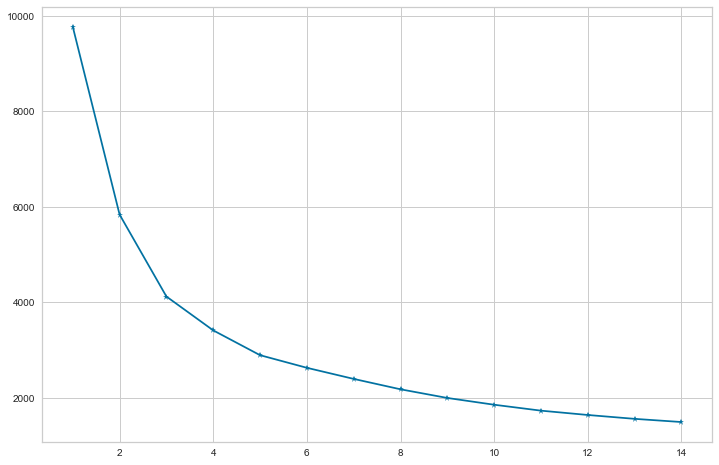

In [33]:
plt.figure(figsize=(12,8))
plt.plot(clusters_df['num_of_clusters'], clusters_df['Cluster_errors'], marker='*')



In [34]:
#create clusters using Kmean clustering

model = KMeans(n_clusters=4, n_init=15, random_state=42)
model.fit(RFM)

KMeans(n_clusters=4, n_init=15, random_state=42)

In [35]:
centroids = model.cluster_centers_
centroids

array([[ 1.25940682, -0.35068728,  1.34778802],
       [-0.91437334, -0.35244916, -0.93148566],
       [-0.66080419,  1.61857467, -0.51069608],
       [ 0.21847774, -0.43787066,  0.0882484 ]])

In [36]:
model.labels_

array([0, 2, 3, ..., 0, 2, 1])

In [37]:
RFM['lables'] = model.labels_

In [38]:
RFM

,frequency,recency,monetary_value,lables
customer_id,,,,
1.0,2.567054,-1.043368,-0.004556,0
2.0,-1.214537,1.586116,-0.506816,2
3.0,0.676258,1.021103,0.168050,3
5.0,0.203559,-0.847786,-0.399822,3
6.0,-0.269139,0.195315,0.584368,3
...,...,...,...,...
3497.0,-1.214537,-0.065461,-0.873404,1
3498.0,0.203559,1.564384,0.077421,2
3499.0,0.676258,-0.087192,1.224189,0


In [39]:
#mean for recency, frequency, monetary

print(RFM.recency.mean())
print(RFM.frequency.mean())
print(RFM.monetary_value.mean())

4.429987513851147e-19
4.573110187375568e-17
2.2224906588720907e-16


<AxesSubplot:>

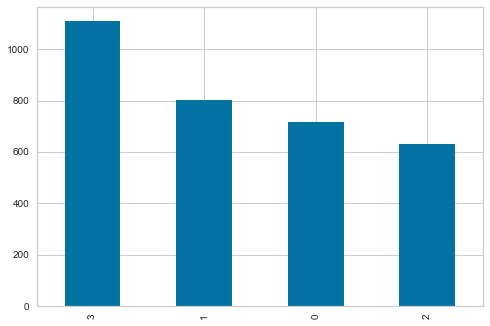

In [40]:
#create bar plots

(RFM.lables.value_counts()).plot(kind='bar')

<AxesSubplot:xlabel='lables', ylabel='count'>

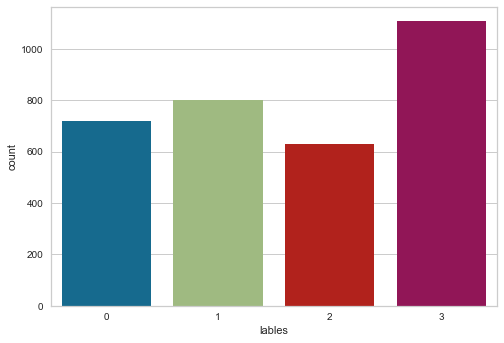

In [41]:
sns.countplot(RFM['lables'])

In [ ]:
pl = sns.scatterplot(data = demographic,x=demographic["past_3_years_bike_related_purchases"], y=demographic["wealth_segment"],hue=demographic["lables"])
pl.set_title("Cluster's Profile Based On Wealth Segment And Past Purchases")
plt.legend()
plt.show()